In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [33]:
df = pd.read_csv("DataSet/fruit data.csv")
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


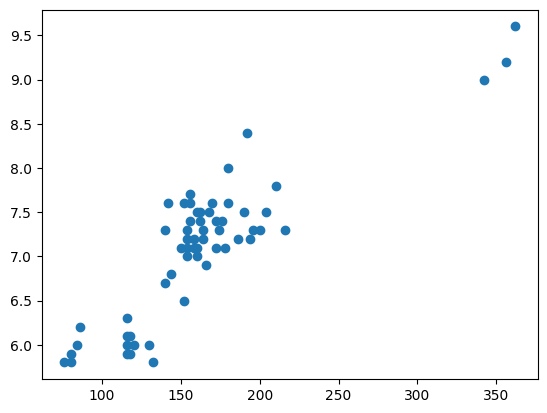

In [34]:
plt.scatter(df.mass, df.width)

<Axes: xlabel='mass', ylabel='width'>

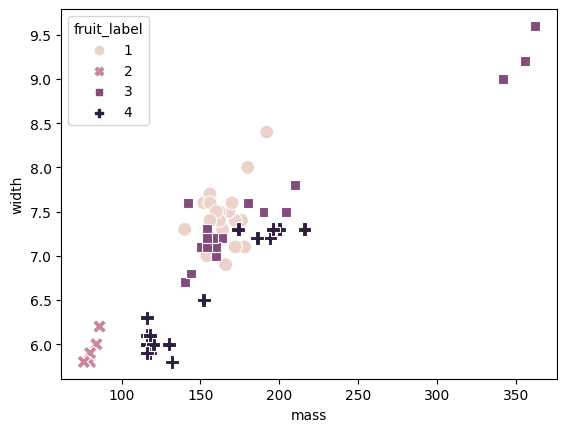

In [35]:
sns.scatterplot(data=df,
                x="mass" ,y= "width", hue="fruit_label",
                style="fruit_label",s=100)

<h3>Model</h3>

In [36]:
x = df.drop(["fruit_label","fruit_name","fruit_subtype"], axis=1)
y = df.fruit_label

In [37]:
from sklearn.model_selection import train_test_split

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=20)

In [38]:
x_train.shape, x_test.shape

((41, 4), (18, 4))

In [39]:
x_train[:10]

,mass,width,height,color_score
51,116,6.0,7.5,0.72
58,118,6.1,8.1,0.70
30,158,7.1,7.5,0.79
27,204,7.5,9.2,0.77
0,192,8.4,7.3,0.55
14,152,7.6,7.3,0.69
41,180,7.6,8.2,0.79
46,216,7.3,10.2,0.71
55,116,6.3,7.7,0.72
10,166,6.9,7.3,0.93


In [47]:
y_train[:10]

51    4
58    4
30    3
27    3
0     1
14    1
41    3
46    4
55    4
10    1
Name: fruit_label, dtype: int64

In [41]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [42]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [43]:
score = model.score(x_test, y_test)
print("score = {:4f}".format(score))

score = 0.888889


In [44]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [45]:
y_pred = model.predict(x_test)

print("Accuracy Score: {:.2f}".format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred, target_names=np.unique(y_test).astype(str)))

Accuracy Score: 0.89
              precision    recall  f1-score   support

           1       1.00      0.71      0.83         7
           2       1.00      1.00      1.00         2
           3       0.80      1.00      0.89         4
           4       0.83      1.00      0.91         5

    accuracy                           0.89        18
   macro avg       0.91      0.93      0.91        18
weighted avg       0.91      0.89      0.89        18



In [49]:
print(np.array(y_test), "<- True")
print(y_pred, "<- Predicted from model")

[2 1 1 4 3 1 4 2 3 3 4 1 4 1 1 1 3 4] <- True
[2 1 4 4 3 1 4 2 3 3 4 1 4 3 1 1 3 4] <- Predicted from model


Text(0.5, 1.0, 'Confusion Matrix')

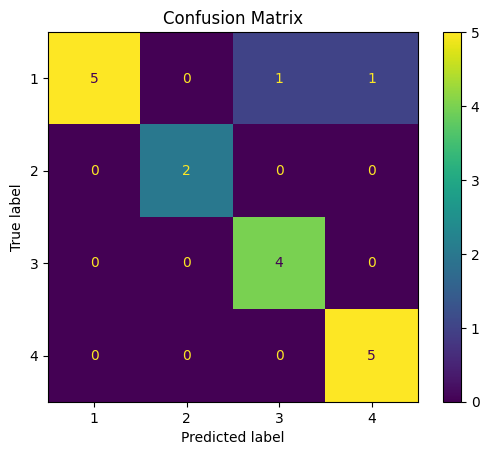

In [46]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=np.unique(y_test).astype(str)).plot()
plt.title("Confusion Matrix")

<h3>Prediction</h3>

In [50]:
x_input = [[192, 8.4, 7.3, 0.55], [118, 6.1, 8.1, 0.70]]

y_predict = model.predict(x_input)
y_predict

C:\Users\Two\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1, 4], dtype=int64)

<h3>Decision Tree</h3>

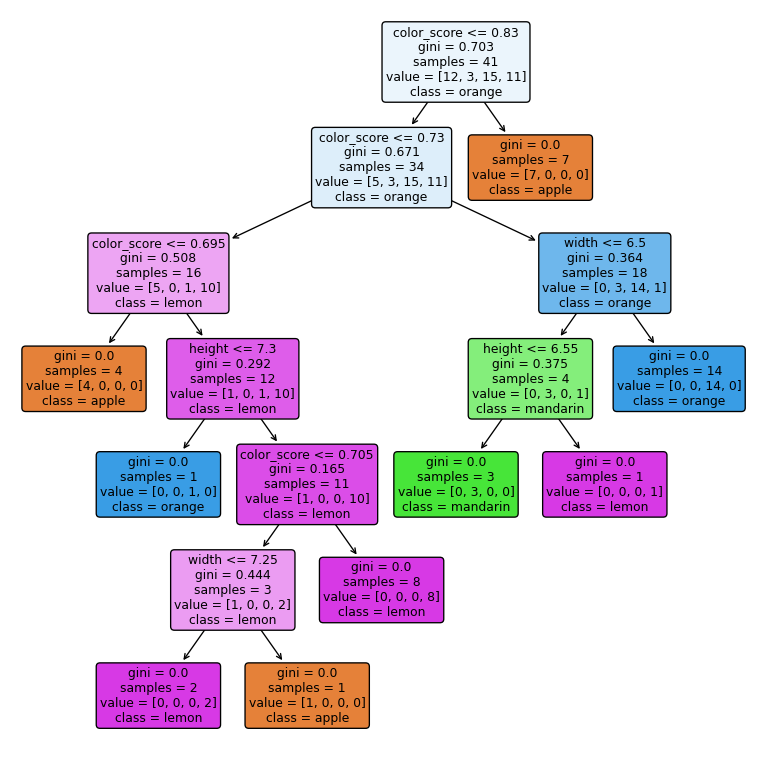

In [51]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

data_feature_names = ['mass', 'width', 'height', 'color_score']
fruit_class = ["apple", "mandarin", "orange", "lemon"]

plt.subplots(nrows=1, ncols=1, figsize=(10, 10), dpi=96)
plot_tree(model, filled=True, rounded=True, feature_names=data_feature_names, class_names=fruit_class)

plt.show()